## Л.Р. 3

Я тут в ходе работы с лабой вспомнил, что в sage есть встроенный генератор эллиптических кривых.  
Но раз уж начал делать бе него, без него и продолжил

Elliptic Curve defined by y^2 = x^3 - 5*x - 2 over Rational Field

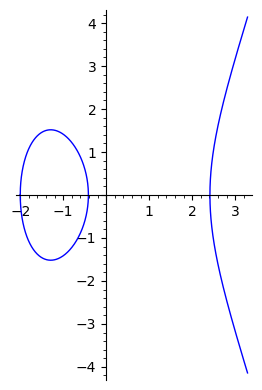

In [175]:
elc = EllipticCurve([-5,-2])
show(elc)
show(plot(elc),aspect_ratio = 1)

Просто графики разных эллептических кривых:

a: -5,b: -2


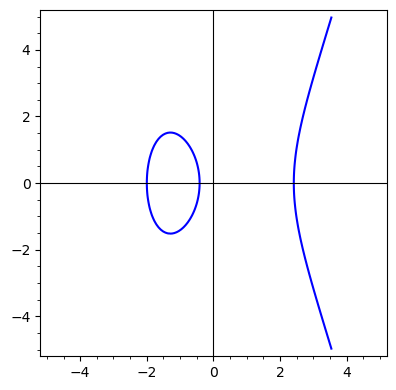

a: -5,b: -1


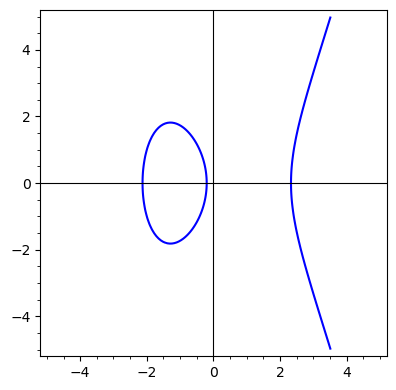

a: -5,b: 0


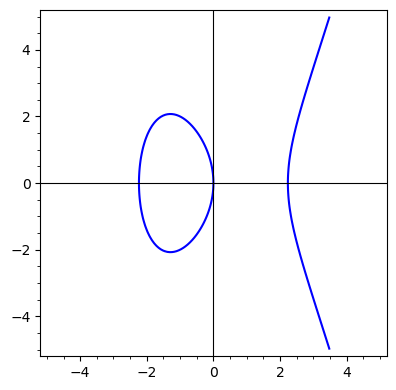

a: -5,b: 1


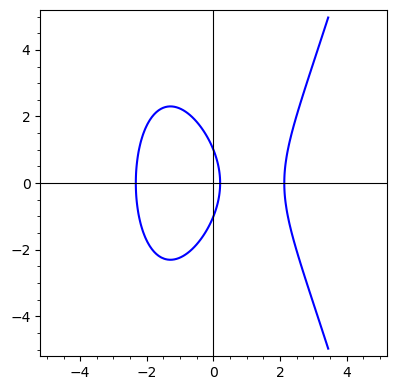

a: -4,b: -2


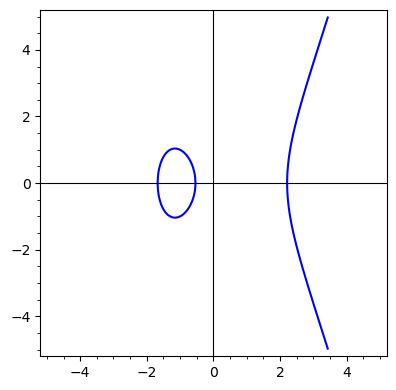

a: -4,b: -1


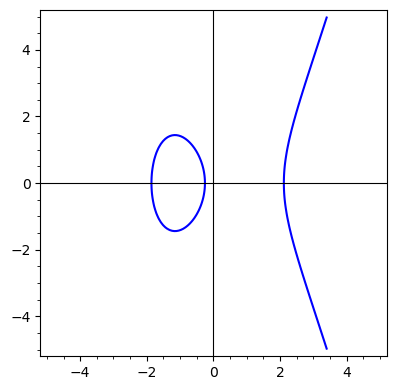

a: -4,b: 0


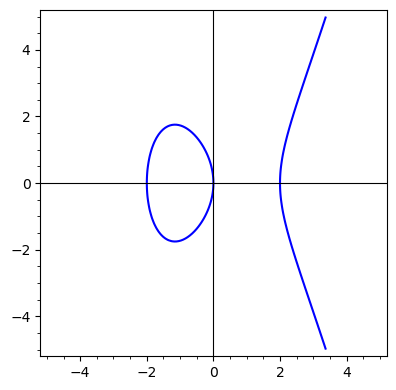

a: -4,b: 1


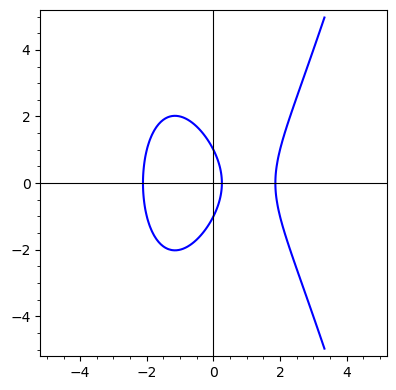

a: -3,b: -2


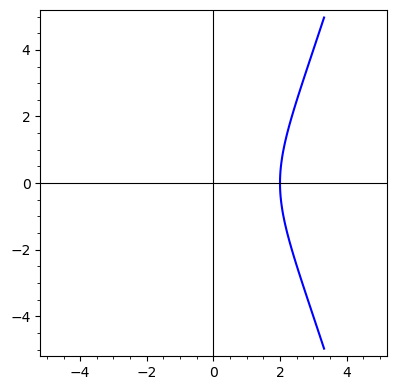

a: -3,b: -1


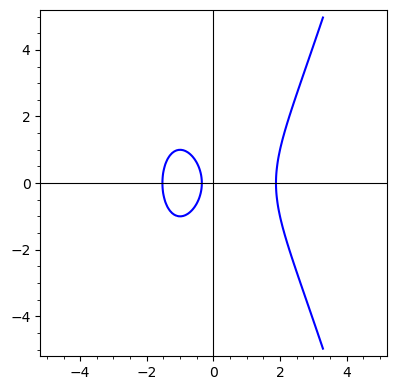

a: -3,b: 0


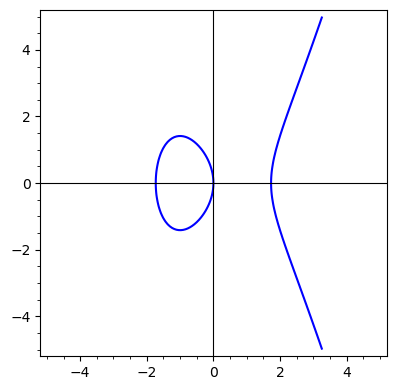

a: -3,b: 1


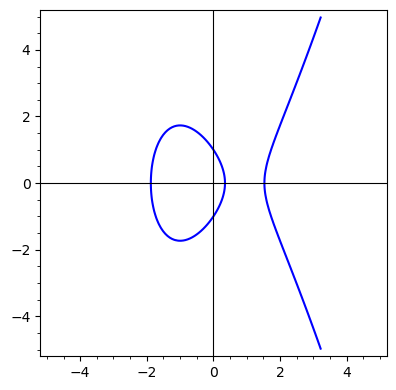

a: -2,b: -2


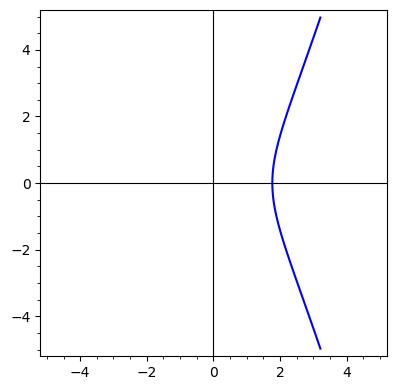

a: -2,b: -1


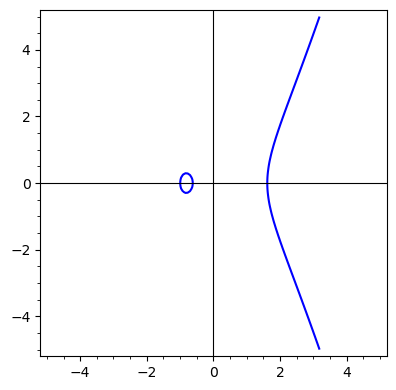

a: -2,b: 0


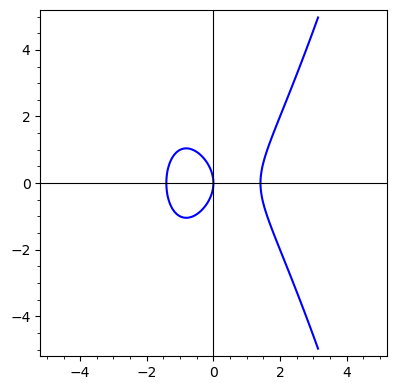

a: -2,b: 1


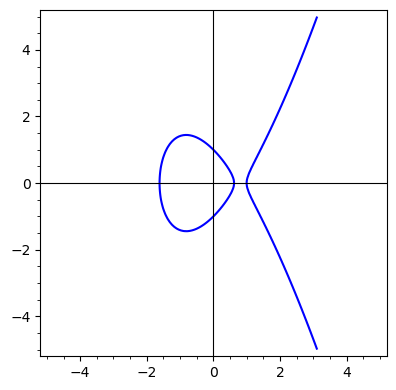

a: -1,b: -2


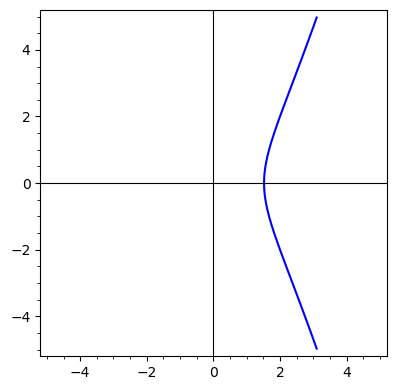

a: -1,b: -1


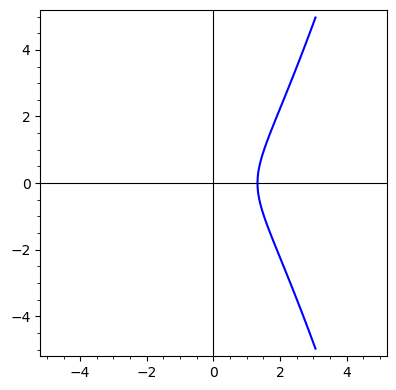

a: -1,b: 0


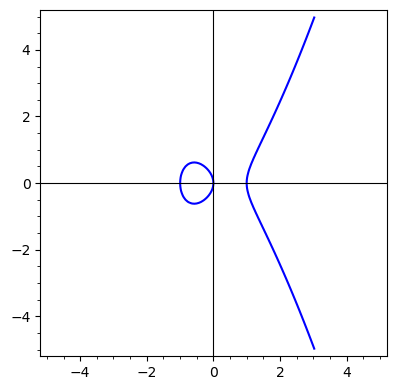

a: -1,b: 1


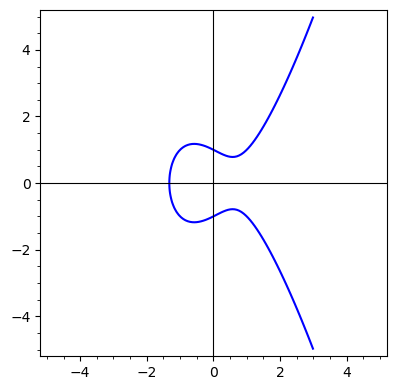

a: 0,b: -2


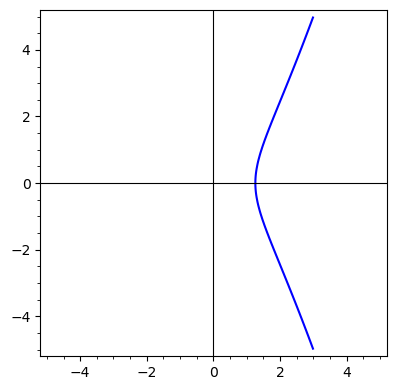

a: 0,b: -1


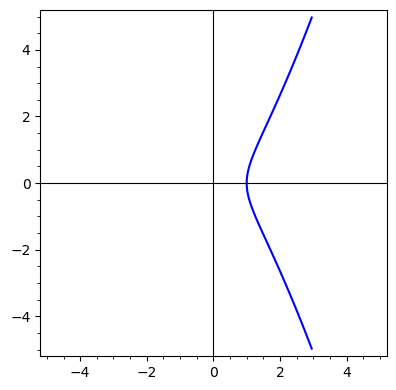

a: 0,b: 1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/sagemath-9.2/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-371-d58232637aa4>", line 7, in <module>
    show(implicit_plot( -y**Integer(2) + x**Integer(3) + a*x + b, (x, -Integer(5), Integer(5)), (y, -Integer(5), Integer(5))),axes = true)
  File "/opt/sagemath-9.2/local/lib/python3.7/site-packages/sage/repl/rich_output/pretty_print.py", line 252, in show
    pretty_print(*args, **kwds)
  File "/opt/sagemath-9.2/local/lib/python3.7/site-packages/sage/repl/rich_output/pretty_print.py", line 223, in pretty_print
    dm.display_immediately(*args, **kwds)
  File "/opt/sagemath-9.2/local/lib/python3.7/site-packages/sage/repl/rich_output/display_manager.py", line 840, in display_immediately
    plain_text, rich_output = self._rich_output_formatter(obj, rich_repr_kwds)
  File "/opt/sagemath-9.2/local/lib/python3.7/site-package

KeyboardInterrupt: 

In [371]:
var("x y")
b = 1
for a in range(-5, 5, 1):
    for b in range(-2, 2, 1):
        if(4*a**2 + 27*b**2 != 0):
            print("a: {},b: {}".format(a,b))
            show(implicit_plot( -y**2 + x**3 + a*x + b, (x, -5, 5), (y, -5, 5)),axes = true)

### Эллиптические кривые над бесконечным полем

сложение точек

In [372]:
def pt_sum(pt1,pt2,a,b,eps = 0.01): #обе точки должн лежать на эллиптической кривой
    if(abs(pt1[0] - pt2[0]) < eps and abs(pt1[1] + pt2[1]) < eps): #проверка на то, являются ли точки отражением друг друга отнолительно оси x
        return (0,0)
    if(pt1 != pt2):
        m = (pt1[1] - pt2[1]) / (pt1[0] - pt2[0])
    else:
        m = (3*(pt2[0])**2 + a)/(2*pt2[1])
    x = m*m - pt1[0] - pt2[0]
    y = - pt1[1] + m*(pt1[0] - x)
    return (x,y)

Поиск порядка точки на кривой над неограниченным полем.

In [187]:
#взять кривую с некими параметрами
#взять заранее определенную точку
#с помощью перебора попытаться найти ее порядок
#если затраченное вряемя не равно 10+-1 мин, попробовать заново с новыми параметрами кривой

In [261]:
def orderBF(a,b, point, trace = true, timeLimit = 10*60): #возвращает порядок точки и точку, полученную за шаг ддо нахождения порядка
    ts = time.time()
    tcur = ts
    ptp = pt
    ptc = pt_sum(pt,pt,a,b)
    n = 1
    while (abs(ptc[0] - 0) > eps or abs(ptc[1] - 0) > eps) and (abs(ptc[0] - 0) != +infinity and abs(ptc[1] - 0) != +infinity):
        n += 1
        if(n % 50 == 0 and trace):
            print("step: {}. point: ({},{})".format(n,ptc[0].n(), ptc[1].n()))
        ptp = ptc
        ptc = pt_sum(pt,ptc,a,b)

        tcur = time.time()
        if(tcur - ts > 10*60):
            if trace:
                print("interrupting calculation: time is out")
                print("    steps done: {}".format(n))
                print("    time passed: {} sec".format(tcur-ts))
            return (0, (0,0), tcur - ts)
    if trace:
        if (abs(ptc[0] - 0) < eps and abs(ptc[1] - 0) < eps) or (abs(ptc[0] - 0) == +infinity and abs(ptc[1] - 0) == +infinity ):
            print("calculation finished")
            print("    order: {}".format(n))
            print("    time passed: {} sec".format(tcur-ts))
            print("last pt: ({},{})".format(ptc[0].n(),ptc[1].n()))
            print("prev pt: ({},{})".format(ptp[0].n(),ptp[1].n()))
    return (n,(ptp[0].n(),ptp[1].n()), tcur - ts)

Перебор разных точек на заданной кривой

curve: x^3 - y^2 + 5*x + 2
_________________________
start point: (0.0,1.4142135623730951)
order: 325, time spent: 0.2897486686706543
fin point: (-0.00106606584127178, -1.41232774864857)
_________________________
start point: (0.5,2.1505813167606567)
order: 336, time spent: 0.23236489295959473
fin point: (0.504421816787452, -2.15649133115283)
_________________________
start point: (1.0,2.8284271247461903)
order: 651, time spent: 0.33234405517578125
fin point: (1.00217807573548, -2.83150822866879)
_________________________
start point: (1.5,3.588175023601831)
order: 492, time spent: 0.2755703926086426
fin point: (1.50392394664276, -3.59460369503238)
_________________________
start point: (2.0,4.47213595499958)
order: 536, time spent: 0.2810239791870117
fin point: (1.99801332671800, -4.46836102269659)
_________________________
start point: (2.5,5.488624600025037)
order: 560, time spent: 0.30376410484313965
fin point: (2.50013085073816, -5.48890770859852)
_________________________
start p

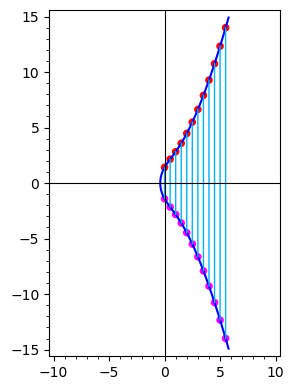

In [373]:
import time
a = 5
b = 2
curve = -y**2 + x**3 + a*x + b
curve_pos = sqrt(x**3 + a*x + b)
plt = implicit_plot(curve, (x, -10, 10), (y, -15, 15)) 
print("curve: {}".format(curve))
for pt_x in range(0,12):
    pt_x/=2.0
    pt = (pt_x,  curve_pos(pt_x)) #точка определена
    print("_________________________")
    print("start point: ({},{})".format(float(pt[0]), float(pt[1])))

    od = orderBF(a,b,pt,trace = false)
    if(od[0] == 0):
        print("order not found")
        print("time spent: {}".format(od[2]))
    else:
        print("order: {}, time spent: {}".format(od[0],od[2]))
        print("fin point: {}".format(od[1]))
        plt += point(pt, color='red', pointsize=30)
        plt += line((pt,od[1]),rgbcolor=hue(0.55))
        plt += point(od[1], color='magenta', pointsize=30)
show(plt,axes = true)

Перебор разных кривых с заданной точкой

'Красная точка – начальная'

'Зеленая – первая итерация'

'Пурпурная – последняя итерация'

'Черта, соединяющая начальную точку и точку последней операции призвана продемонстрироать, что они находятся друг над другом'

a: -5,b: -5
(3.00000000000000, 2.64575131106459)
starting order calculation
order: 5155, time spent: 2.910459280014038
fin point: (3.00106612575320, -2.65018209938693)


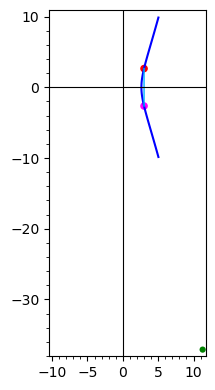

a: -5,b: -3
(3.00000000000000, 3.00000000000000)
starting order calculation
order: 149, time spent: 0.08125066757202148
fin point: (3.00023941497935, -3.00087787588369)


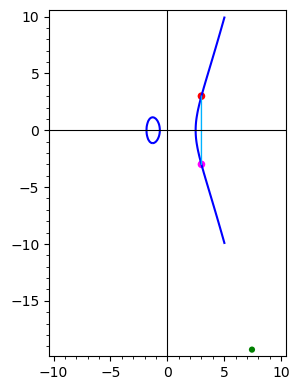

a: -5,b: -1
(3.00000000000000, 3.31662479035540)
starting order calculation
order: 357, time spent: 0.19820451736450195
fin point: (3.00022475913872, -3.31737021688163)


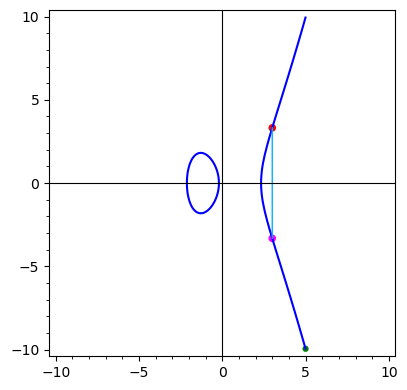

a: -5,b: 1
(3.00000000000000, 3.60555127546399)
starting order calculation
order: 334, time spent: 0.17855620384216309
fin point: (2.99902337692876, -3.60257170303758)


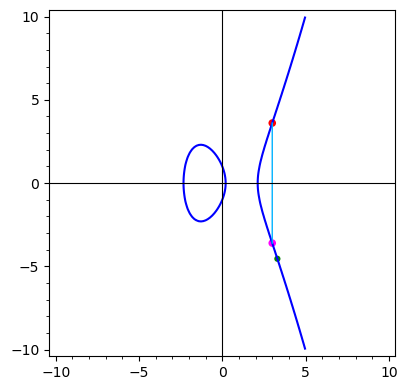

a: -5,b: 3
(3.00000000000000, 3.87298334620742)
starting order calculation
order: 5419, time spent: 3.0901944637298584
fin point: (2.99783693396215, -3.86683890214365)


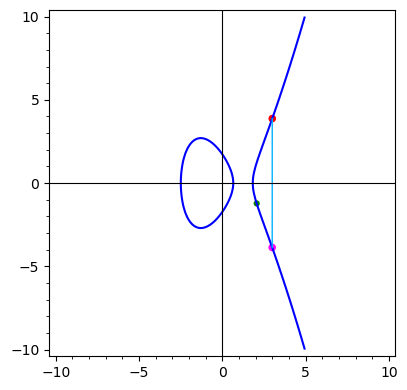

a: -3,b: -5
(3.00000000000000, 3.60555127546399)
starting order calculation
order: 620, time spent: 0.32640671730041504
fin point: (2.99845672124072, -3.60041424389260)


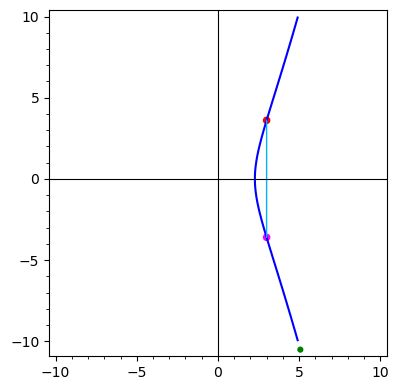

a: -3,b: -3
(3.00000000000000, 3.87298334620742)
starting order calculation
order: 4945, time spent: 2.773716449737549
fin point: (2.99686802485862, -3.86327714557181)


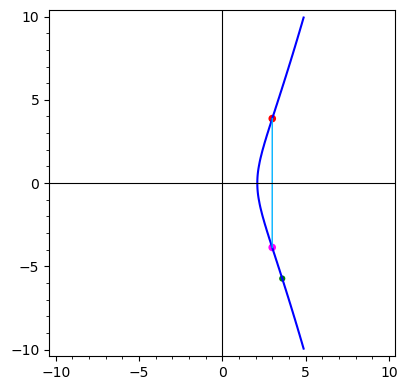

a: -3,b: -1
(3.00000000000000, 4.12310562561766)
starting order calculation
order: 2847, time spent: 1.4976906776428223
fin point: (3.00191776416847, -4.12868765370311)


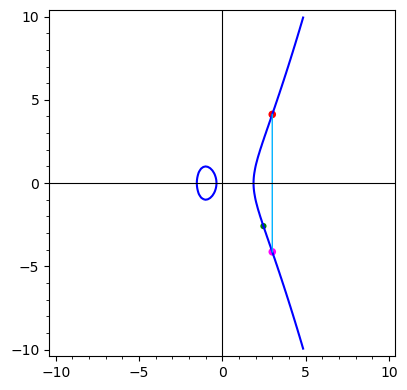

a: -3,b: 1
(3.00000000000000, 4.35889894354067)
starting order calculation
order: 50, time spent: 0.028320789337158203
fin point: (2.99767652012919, -4.35250330931353)


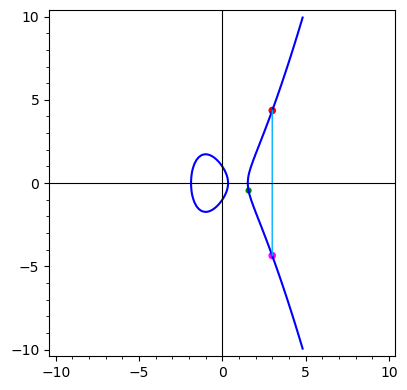

a: -3,b: 3
(3.00000000000000, 4.58257569495584)
starting order calculation
order: 1639, time spent: 0.8835113048553467
fin point: (3.00282111030178, -4.58996877135059)


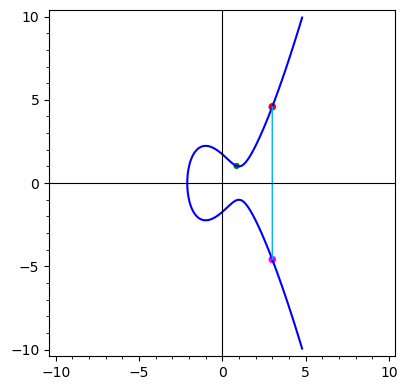

a: -1,b: -5
(3.00000000000000, 4.35889894354067)
starting order calculation
order: 3972, time spent: 2.2320895195007324
fin point: (2.99781153778514, -4.35237273702029)


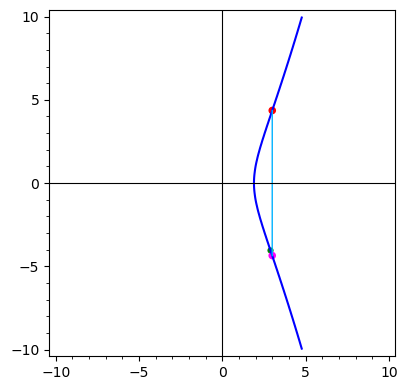

a: -1,b: -3
(3.00000000000000, 4.58257569495584)
starting order calculation
order: 1367, time spent: 0.7214930057525635
fin point: (3.00167430862357, -4.58732571885722)


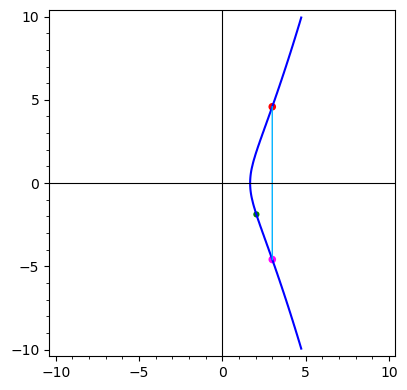

a: -1,b: -1
(3.00000000000000, 4.79583152331272)
starting order calculation
order: 2695, time spent: 1.4357376098632812
fin point: (3.00060588836512, -4.79747397105227)


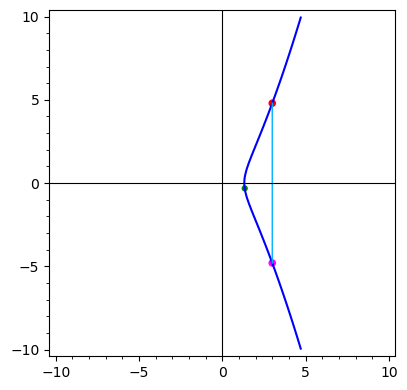

a: -1,b: 1
(3.00000000000000, 5.00000000000000)
starting order calculation
order: 589, time spent: 0.315504789352417
fin point: (3.00367408365102, -5.00955564039272)


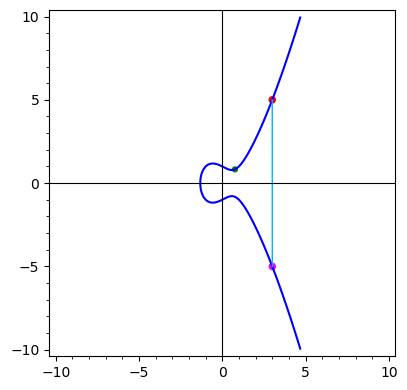

a: -1,b: 3
(3.00000000000000, 5.19615242270663)
starting order calculation
order: 12650, time spent: 6.7351624965667725
fin point: (3.00056217302774, -5.19755850578723)


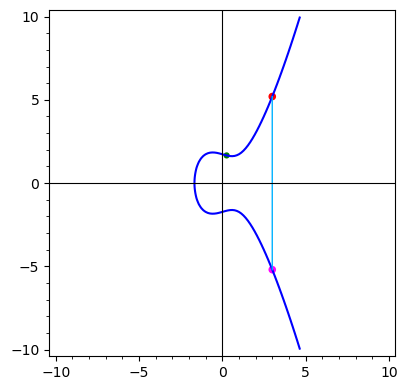

a: 1,b: -5
(3.00000000000000, 5.00000000000000)
starting order calculation
order: 2001, time spent: 1.0836970806121826
fin point: (3.00111515109782, -5.00312342181670)


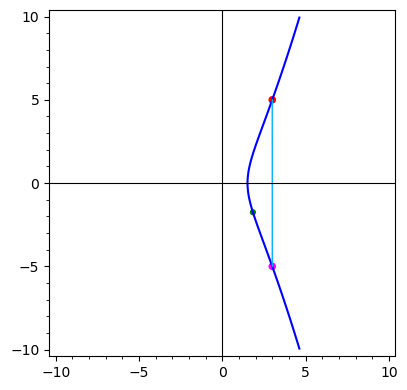

a: 1,b: -3
(3.00000000000000, 5.19615242270663)
starting order calculation
order: 4679, time spent: 2.545041799545288
fin point: (2.99848399039676, -5.19206836451426)


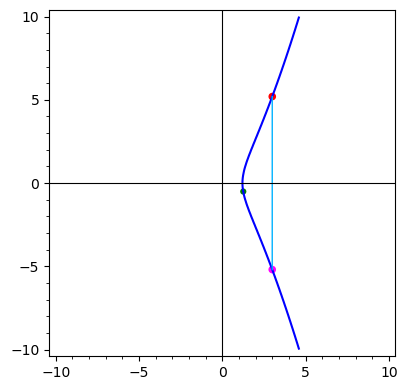

a: 1,b: -1
(3.00000000000000, 5.38516480713450)
starting order calculation
order: 336, time spent: 0.2564988136291504
fin point: (2.99660793266893, -5.37634872669402)


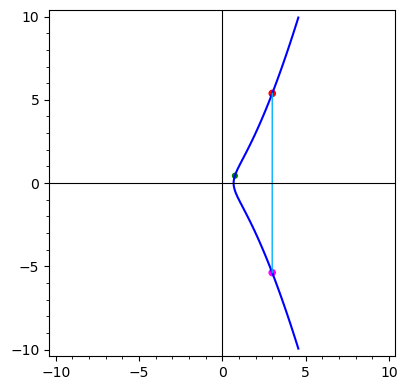

a: 1,b: 1
(3.00000000000000, 5.56776436283002)
starting order calculation
order: 1756, time spent: 0.9913973808288574
fin point: (2.99759128624840, -5.56170910905589)


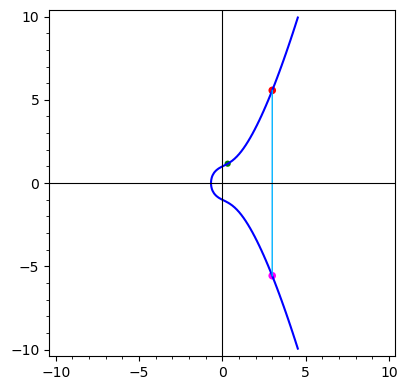

a: 1,b: 3
(3.00000000000000, 5.74456264653803)
starting order calculation
order: 216, time spent: 0.11334109306335449
fin point: (2.99684552426420, -5.73687756575364)


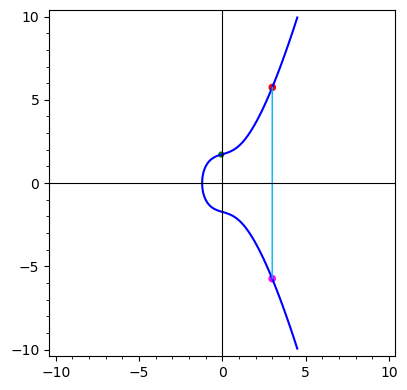

a: 3,b: -5
(3.00000000000000, 5.56776436283002)
starting order calculation
order: 2386, time spent: 1.32826828956604
fin point: (2.99807446320920, -5.56257732032094)


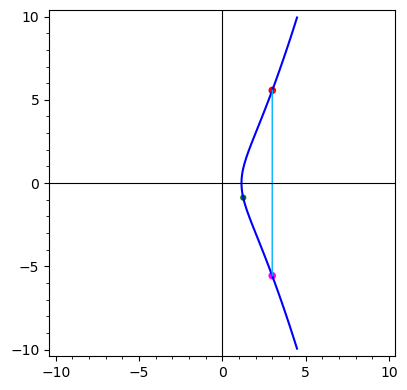

a: 3,b: -3
(3.00000000000000, 5.74456264653803)
starting order calculation
order: 824, time spent: 0.5371847152709961
fin point: (3.00342005302022, -5.75349521852491)


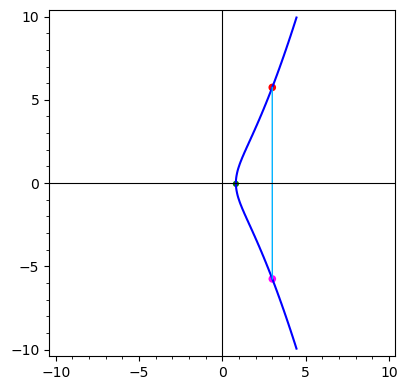

a: 3,b: -1
(3.00000000000000, 5.91607978309962)
starting order calculation
order: 10563, time spent: 5.7372918128967285
fin point: (2.99727765282492, -5.90918024525702)


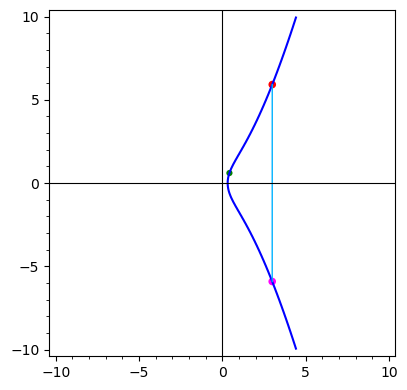

a: 3,b: 1
(3.00000000000000, 6.08276253029822)
starting order calculation
order: 4798, time spent: 3.2613606452941895
fin point: (2.99898787798654, -6.08026600691836)


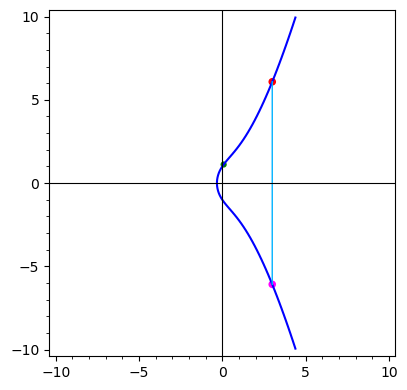

a: 3,b: 3
(3.00000000000000, 6.24499799839840)
starting order calculation
order: 2013, time spent: 1.0295069217681885
fin point: (2.99816827227978, -6.24059919664114)


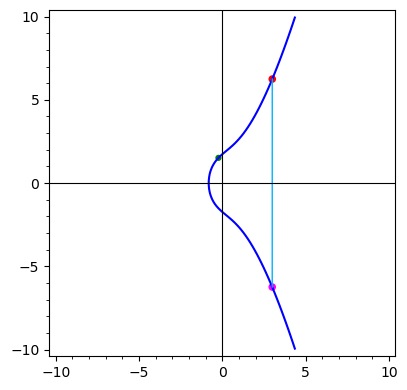

In [203]:
import time
var("x y")
pt_x = 3.0
show("Красная точка – начальная")
show("Зеленая – первая итерация")
show("Пурпурная – последняя итерация")
show("Черта, соединяющая начальную точку и точку последней операции призвана продемонстрироать, что они находятся друг над другом")
for a in range(-5, 5, 2):
    for b in range(-5, 5, 2):
        if(4*a**2 + 27*b**2 != 0):
            print("a: {},b: {}".format(a,b))
            curve = -y**2 + x**3 + a*x + b
            curve_pos = sqrt(x**3 + a*x + b)
            pt_y = curve_pos(pt_x)
            pt = (pt_x,  curve_pos(pt_x)) #точка определена
            print(pt)
            plt = (implicit_plot(curve, (x, -10, 10), (y, -10, 10)) 
                 + point(pt, color='red', pointsize=20) 
                 + point(pt_sum(pt,pt,a,b), color='green', pointsize=20))
            
            print("starting order calculation")
            ptc = pt_sum(pt,pt,a,b)
            n = 1
            eps = 0.01
            ts = time.time()
            od = orderBF(a,b,pt,trace = false)
            if(od[0] == 0):
                print("order not found")
                print("time spent: {}".format(od[2]))
            else:
                print("order: {}, time spent: {}".format(od[0],od[2]))
                print("fin point: {}".format(od[1]))
                plt += point(pt, color='red', pointsize=30)
                plt += line((pt,od[1]),rgbcolor=hue(0.55))
                plt += point(od[1], color='magenta', pointsize=30)
                show(plt,axes = true)

Я мог бы в примерах выше не переводить координаты точки в действительные числа и считать как рациональные, но там бы все равно без прближения ничего не нашлось, а с приближением это то же, что и действительные, только медленнее  

Если я не ошибаюсь, понятие порядка точки на кривой над неограниченным действительным полем особо не имеет смысла, так что перейдем к конечному полю

### Эллиптические кривые над конечным полем

Сложение точек:

In [308]:
def pt_sum_fin(pt1,pt2,a,b,p): #обе точки должн лежать на эллиптической кривой
    if(pt1 == (0,0)):
        return pt2
    if(pt2 == (0,0)):
        return pt1
    if(abs(pt1[0] - pt2[0]) == 0 and abs(pt1[1] - pt2[1]) != 0):
        return (0,0)
    if(pt1 != pt2):
        m = ((pt1[1] - pt2[1]) / (pt1[0] - pt2[0])) % p
    else:
        m = ((3*(pt2[0])**2 + a)/(2*pt2[1])) % p
    x = ( m*m - pt1[0] - pt2[0] ) % p
    y = (- pt1[1] + m*(pt1[0] - x) ) % p
    return (x,y)

Генерация точек кривой с последующим выводом на экран:

In [313]:
#эллиптическая кривая над конечным полем
def func (x, a, b):
    return (x**3 + a*x + b)

def finiteCurve(a,b,p,silent = false):
    if(4*a**3 + 27*b**2)%p == 0 :
        return ()
    
    v1 = [(k,f) for k in range (p) 
                  for f in range (p) 
                      if (f*f) % p == func(k,a,b) % p]

    plt = point((0,0), rgbcolor=hue(0), pointsize=1)
    for i in v1:
        plt += point(i, rgbcolor=hue(0.55), pointsize=30)
    if(not silent):
        show(plt,aspect_ratio = 1, xmin = 0,xmax=p,ymin=0,ymax=p)
    return v1

Я взял параметры такие же, как в статье "Доступно о криптографии на эллиптических кривых" на Хабре

In [418]:
a = -7
b = 10
p = 19

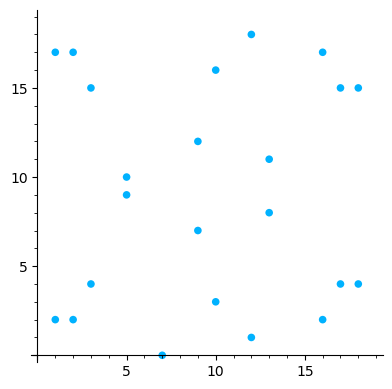

In [409]:
pts = finiteCurve(a,b,p)

In [288]:
def locate(i,pts): #Поиск всех точек с заданной координатой x (полезно при дебаге)
    for ite in pts:
        if ite[0] == i:
            print(ite)

Последовательное сложение точки с собой задает циклический процесс

In [410]:
ptstart = pts[0]
print("point: {}".format(ptstart))
print("______")
mk = 0
ptcur = ptstart
print("0*P =\t (0, 0)")
for k in range (100):
    print("{}*P =\t {}".format(k + 1,ptcur))
    ptcur = pt_sum_fin(ptstart,ptcur,a,b,p)
    if(k != 0 and ptcur == (0,0) and mk == 1):
        print("{}*P =\t {}".format(k + 1,ptcur))
        mk = 0
        break
    if(k!= 0 and ptcur == (0,0)):
        mk = 1

point: (1, 2)
______
0*P =	 (0, 0)
1*P =	 (1, 2)
2*P =	 (18, 15)
3*P =	 (9, 12)
4*P =	 (7, 0)
5*P =	 (9, 7)
6*P =	 (18, 4)
7*P =	 (1, 17)
8*P =	 (0, 0)
9*P =	 (1, 2)
10*P =	 (18, 15)
11*P =	 (9, 12)
12*P =	 (7, 0)
13*P =	 (9, 7)
14*P =	 (18, 4)
15*P =	 (1, 17)
15*P =	 (0, 0)


Функция, выполняющая отыскание порядка точки:

In [424]:
def orderPt(ptf,a,b,p,trace = 0):
    ptsum = ptf
    it = 0 
    while (ptsum != (0,0) or it == 0):
        it += 1
        ptsum = pt_sum_fin(ptf,ptsum,a,b,p)
        if(trace and it % trace == 0):
            print("step: {} point: {}".format(it,ptsum))
    return it + 1

Поиск порядка всех точек из построенного набора:

In [425]:
i = 0
for pt99 in pts:
    try:
        ord = orderPt(pt99,a,b,p)
        print("{}  \torder: {}".format(pt99, ord))
    except ZeroDivisionError:
        print("{}  \tunable to calculate order".format(pt99))

(1, 2)  	order: 339
(1, 17)  	order: 54
(2, 2)  	order: 345
(2, 17)  	order: 88
(3, 4)  	order: 54
(3, 15)  	order: 337
(5, 9)  	order: 161
(5, 10)  	order: 168
(7, 0)  	unable to calculate order
(9, 7)  	order: 338
(9, 12)  	order: 182
(10, 3)  	order: 115
(10, 16)  	order: 5
(12, 1)  	order: 121
(12, 18)  	order: 179
(13, 8)  	order: 361
(13, 11)  	order: 40
(16, 2)  	order: 40
(16, 17)  	order: 359
(17, 4)  	order: 346
(17, 15)  	order: 69
(18, 4)  	order: 324
(18, 15)  	order: 361


Ошибка "unable to calculate order" возникает, когда оператор % над полем рациональных числел (а вычисления происходят в них)   выдает ошибку деления на ноль.  
Это происходит из-за того что он там каким-то образом применяет функцию inverse_mod(a, b), а она не работает, если b%a = 0  
Не знаю, должно ли так быть или нет, но вряд ли ошибка в операторе %, все-таки sage – это неплохая такая СКА, не думаю, что в ее функциях могут быть такие ошибки

К тому же, в примере выше, порядок не получилось посчитать у довольно особенной точки, у которой единственной не было симмитричной пары. Думаю, дело в этом. Инетресно, что в примерах с P из статьи порядок точек находится почти всегда, при этом если всзять случайную p, то часто порядок не находится почти ни у одной точки  

Также, если p большая и четная, нанесенные на плоскость точки образуют циклически повторяющуюся как по вертикали, так и по горизонтали структуру.

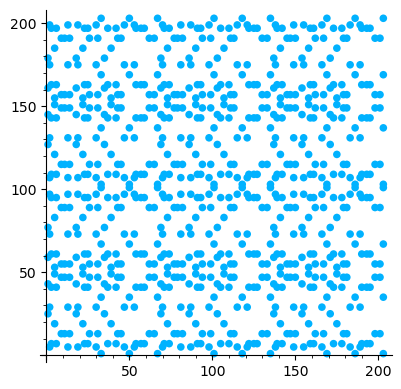

In [341]:
#пример случая, описанного выше
ptsc = finiteCurve(5,7,204)

При этом, судя по всему, дело не в кривой – какую кривую не возьми, если испольовать p из примера, то найдется порядок почти у всех точек

In [339]:
is_prime(487)

True

In [340]:
is_prime(97)

True

Оооо  
Понятно  
P должно быть простым числом  
Ну да, как я выяснил раньше, ошибка возникает, когда какое-то число (кажется, знаменатель одной из дробей является делителем p 
Естетвенно, чтобы минимизировать вероятность этого, надо брать простые p
Тогда, получается, если я сам возьму какое-нбудь простое число, порядок большинства точек также должен вычислиться

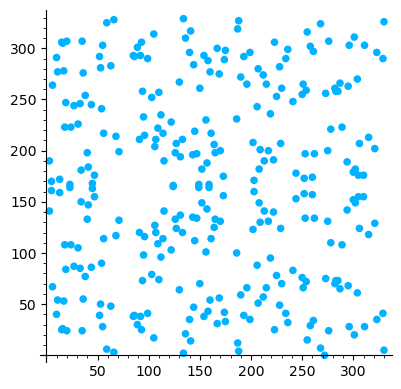

(3, 190)  	order: 102
(5, 161)  	order: 153
(5, 170)  	order: 153
(6, 67)  	order: 306
(6, 264)  	order: 306
(10, 40)  	order: 153
(10, 291)  	order: 153
(11, 54)  	order: 153
(11, 277)  	order: 153
(13, 159)  	order: 102
(13, 172)  	order: 102
(15, 25)  	order: 153
(15, 306)  	order: 153
(16, 26)  	order: 102
(16, 305)  	order: 102
(17, 53)  	order: 153
(17, 278)  	order: 153
(18, 108)  	order: 51
(18, 223)  	order: 51
(19, 84)  	order: 102
(19, 247)  	order: 102
(20, 24)  	order: 153
(20, 307)  	order: 153
(23, 164)  	order: 153
(23, 167)  	order: 153
(24, 108)  	order: 17
(24, 223)  	order: 17
(27, 87)  	order: 306
(27, 244)  	order: 306
(31, 105)  	order: 102
(31, 226)  	order: 102
(33, 85)  	order: 102
(33, 246)  	order: 102
(34, 150)  	order: 306
(34, 181)  	order: 306
(35, 24)  	order: 153
(35, 307)  	order: 153
(36, 55)  	order: 51
(36, 276)  	order: 51
(38, 77)  	order: 306
(38, 254)  	order: 306
(40, 133)  	order: 306
(40, 198)  	order: 306
(41, 147)  	order: 153
(41, 184)  	

In [420]:
a = -8
b = 18
p = 331
pts2 = finiteCurve(a,b,p)

i = 0
for pt99 in pts2:
    if(i ==0): 
        i+= 1
        continue
    try:
        ord = orderPt(pt99,a,b,p)
        print("{}  \torder: {}".format(pt99, ord))
    except ZeroDivisionError:
        print("{}  \tunable to calculate order".format(pt99))

Действительно, так  
Я как-то упустил этот момент, наверное, об этом все-таки говорится в статье

Полагаю, в тех случаях, когда все равно не удается вычислить порядок, либо само p, либо 1 попадают на вход той функции

 ### Кривая, порядок каждой точки которой находится полным перебором

Принимая во внимание все написанное выше, я решил, что задача лабораторной работы – найти такую кривую , в которой порядок можно найти у вех точек.
Поиск производился таким циклом:

In [421]:
def searchIdeal():
    for a in range(-10,10, 3):
        for b in range(-10,10, 3):
            for p in range(31,15,-2):
                print("a = {} b = {} p = {}".format(a,b,p))
                ptsc = finiteCurve(a,b,p,silent = true)
                print("points total: {}".format(len(ptsc)))
                if(len(ptsc) == 0):
                    continue
                found = 0
                err = 0
                i = 0
                for pt99 in ptsc:
                    if(i ==0): 
                        i+= 1
                        continue
                    try:
                        ord = orderPt(pt99,a,b,p)
                        found += 1
                    except ZeroDivisionError:
                        err += 1
                print("\tpoints found\t {}".format(found))
                print("\terror in\t {}".format(err))
                if(err == 0):
                    return(a,b,p)

In [344]:
searchIdeal()

a = -10 b = -10 p = 31
points total: 31
	points found	 29
	error in	 1
a = -10 b = -10 p = 29
points total: 34
	points found	 33
	error in	 0


(-10, -10, 29)

Подходящая кривая нашлась очень быстро. Проверим, действительно ли все точки находятся:

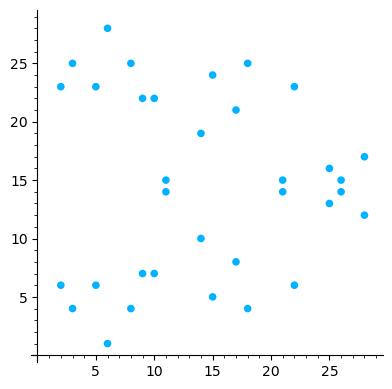

(2, 23)  	order: 35
(3, 4)  	order: 35
(3, 25)  	order: 35
(5, 6)  	order: 7
(5, 23)  	order: 7
(6, 1)  	order: 35
(6, 28)  	order: 35
(8, 4)  	order: 35
(8, 25)  	order: 35
(9, 7)  	order: 35
(9, 22)  	order: 35
(10, 7)  	order: 35
(10, 22)  	order: 35
(11, 14)  	order: 35
(11, 15)  	order: 35
(14, 10)  	order: 35
(14, 19)  	order: 35
(15, 5)  	order: 35
(15, 24)  	order: 35
(17, 8)  	order: 5
(17, 21)  	order: 5
(18, 4)  	order: 35
(18, 25)  	order: 35
(21, 14)  	order: 35
(21, 15)  	order: 35
(22, 6)  	order: 35
(22, 23)  	order: 35
(25, 13)  	order: 5
(25, 16)  	order: 5
(26, 14)  	order: 7
(26, 15)  	order: 7
(28, 12)  	order: 7
(28, 17)  	order: 7


In [345]:
a = -10
b = -10
p = 29
pts2 = finiteCurve(a,b,p)

i = 0
for pt99 in pts2:
    if(i ==0): 
        i+= 1
        continue
    try:
        ord = orderPt(pt99,a,b,p)
        print("{}  \torder: {}".format(pt99, ord))
    except ZeroDivisionError:
        print("{}  \tunable to calculate order".format(pt99))

Думаю, стоит поискать и кривые с большим p
Для этого не помешает сгенерировать список довольно больших простых чисел

In [355]:
myPrimes = []
for i in range(1000, 400, -1):
    for k in range(2,i,1):
        if(i % k == 0):
            break
        if(k == i-1):
            myPrimes.append(i)
print(myPrimes)

[997, 991, 983, 977, 971, 967, 953, 947, 941, 937, 929, 919, 911, 907, 887, 883, 881, 877, 863, 859, 857, 853, 839, 829, 827, 823, 821, 811, 809, 797, 787, 773, 769, 761, 757, 751, 743, 739, 733, 727, 719, 709, 701, 691, 683, 677, 673, 661, 659, 653, 647, 643, 641, 631, 619, 617, 613, 607, 601, 599, 593, 587, 577, 571, 569, 563, 557, 547, 541, 523, 521, 509, 503, 499, 491, 487, 479, 467, 463, 461, 457, 449, 443, 439, 433, 431, 421, 419, 409, 401]


Предыдущю версию searchIdeal я писал еще не разобравшись с простыми числами, так что там p перебирается просто случайно
Здесь генерация точек будет медленной, так что надо, чтобы все p были ваидными.

In [361]:
def searchIdealP(Primes):
    for a in range(-10,10, 3):
        for b in range(-10,10, 3):
            for p in Primes:
                print("a = {} b = {} p = {}".format(a,b,p))
                ptsc = finiteCurve(a,b,p,silent = true)
                print("points total: {}".format(len(ptsc)))
                if(len(ptsc) == 0):
                    continue
                found = 0
                err = 0
                i = 0
                for pt99 in ptsc:
                    if(i ==0): 
                        i+= 1
                        continue
                    try:
                        ord = orderPt(pt99,a,b,p)
                        found += 1
                    except ZeroDivisionError:
                        err += 1
                print("\tpoints found\t {}".format(found))
                print("\terror in\t {}".format(err))
                if(err == 0):
                    return(a,b,p)

In [362]:
searchIdealP(myPrimes)

a = -10 b = -10 p = 997
points total: 990
	points found	 989
	error in	 0


(-10, -10, 997)

Чтобы найти как можно большее P, я сгенерировал список простых чисел от большего к меньшему.  
На удивление, первое же число в списек оказалось подходящим

In [359]:
myPrimes2 = []
for i in range(2000, 1500, -1):
    for k in range(2,i,1):
        if(i % k == 0):
            break
        if(k == i-1):
            myPrimes2.append(i)
print(myPrimes2)

[1999, 1997, 1993, 1987, 1979, 1973, 1951, 1949, 1933, 1931, 1913, 1907, 1901, 1889, 1879, 1877, 1873, 1871, 1867, 1861, 1847, 1831, 1823, 1811, 1801, 1789, 1787, 1783, 1777, 1759, 1753, 1747, 1741, 1733, 1723, 1721, 1709, 1699, 1697, 1693, 1669, 1667, 1663, 1657, 1637, 1627, 1621, 1619, 1613, 1609, 1607, 1601, 1597, 1583, 1579, 1571, 1567, 1559, 1553, 1549, 1543, 1531, 1523, 1511]


In [363]:
searchIdealP(myPrimes2)

a = -10 b = -10 p = 1999
points total: 2058
	points found	 2057
	error in	 0


(-10, -10, 1999)

И с большим P то же самое

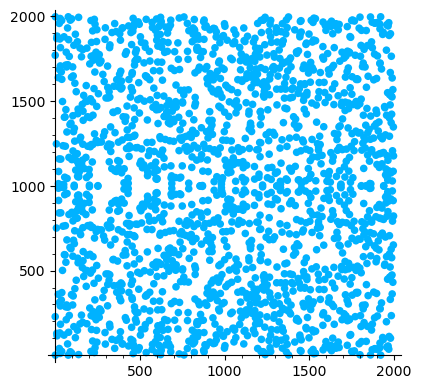

(0, 1771)  	order: 1941
(1, 1)  	order: 647
(1, 1998)  	order: 647
(7, 751)  	order: 647
(7, 1248)  	order: 647
(9, 129)  	order: 647
(9, 1870)  	order: 647
(11, 115)  	order: 1941
(11, 1884)  	order: 1941
(18, 360)  	order: 1941
(18, 1639)  	order: 1941
(19, 986)  	order: 1941
(19, 1013)  	order: 1941
(20, 914)  	order: 647
(20, 1085)  	order: 647
(23, 840)  	order: 1941
(23, 1159)  	order: 1941
(24, 40)  	order: 1941
(24, 1959)  	order: 1941
(25, 312)  	order: 647
(25, 1687)  	order: 647
(27, 132)  	order: 1941
(27, 1867)  	order: 1941
(29, 11)  	order: 1941
(29, 1988)  	order: 1941
(30, 291)  	order: 1941
(30, 1708)  	order: 1941
(31, 183)  	order: 1941
(31, 1816)  	order: 1941
(33, 841)  	order: 1941
(33, 1158)  	order: 1941
(35, 992)  	order: 1941
(35, 1007)  	order: 1941
(36, 326)  	order: 1941
(36, 1673)  	order: 1941
(38, 23)  	order: 1941
(38, 1976)  	order: 1941
(39, 370)  	order: 1941
(39, 1629)  	order: 1941
(43, 501)  	order: 647
(43, 1498)  	order: 647
(46, 762)  	order: 

(371, 413)  	order: 1941
(371, 1586)  	order: 1941
(373, 741)  	order: 1941
(373, 1258)  	order: 1941
(374, 892)  	order: 1941
(374, 1107)  	order: 1941
(379, 855)  	order: 647
(379, 1144)  	order: 647
(380, 340)  	order: 647
(380, 1659)  	order: 647
(381, 101)  	order: 1941
(381, 1898)  	order: 1941
(385, 139)  	order: 1941
(385, 1860)  	order: 1941
(387, 322)  	order: 647
(387, 1677)  	order: 647
(388, 427)  	order: 1941
(388, 1572)  	order: 1941
(391, 380)  	order: 1941
(391, 1619)  	order: 1941
(392, 922)  	order: 1941
(392, 1077)  	order: 1941
(394, 419)  	order: 647
(394, 1580)  	order: 647
(395, 69)  	order: 1941
(395, 1930)  	order: 1941
(396, 728)  	order: 1941
(396, 1271)  	order: 1941
(398, 66)  	order: 647
(398, 1933)  	order: 647
(401, 591)  	order: 647
(401, 1408)  	order: 647
(406, 981)  	order: 647
(406, 1018)  	order: 647
(407, 898)  	order: 1941
(407, 1101)  	order: 1941
(413, 618)  	order: 1941
(413, 1381)  	order: 1941
(414, 222)  	order: 1941
(414, 1777)  	order: 1

(699, 736)  	order: 1941
(699, 1263)  	order: 1941
(700, 620)  	order: 1941
(700, 1379)  	order: 1941
(701, 606)  	order: 1941
(701, 1393)  	order: 1941
(704, 318)  	order: 1941
(704, 1681)  	order: 1941
(705, 207)  	order: 1941
(705, 1792)  	order: 1941
(710, 950)  	order: 647
(710, 1049)  	order: 647
(711, 502)  	order: 1941
(711, 1497)  	order: 1941
(712, 521)  	order: 647
(712, 1478)  	order: 647
(713, 404)  	order: 1941
(713, 1595)  	order: 1941
(714, 534)  	order: 647
(714, 1465)  	order: 647
(724, 155)  	order: 1941
(724, 1844)  	order: 1941
(727, 252)  	order: 647
(727, 1747)  	order: 647
(729, 594)  	order: 1941
(729, 1405)  	order: 1941
(731, 791)  	order: 647
(731, 1208)  	order: 647
(732, 8)  	order: 1941
(732, 1991)  	order: 1941
(734, 312)  	order: 647
(734, 1687)  	order: 647
(735, 953)  	order: 1941
(735, 1046)  	order: 1941
(736, 717)  	order: 1941
(736, 1282)  	order: 1941
(737, 668)  	order: 1941
(737, 1331)  	order: 1941
(740, 435)  	order: 1941
(740, 1564)  	order:

(1052, 873)  	order: 1941
(1052, 1126)  	order: 1941
(1055, 79)  	order: 1941
(1055, 1920)  	order: 1941
(1057, 516)  	order: 1941
(1057, 1483)  	order: 1941
(1058, 158)  	order: 1941
(1058, 1841)  	order: 1941
(1059, 148)  	order: 1941
(1059, 1851)  	order: 1941
(1060, 509)  	order: 1941
(1060, 1490)  	order: 1941
(1061, 864)  	order: 1941
(1061, 1135)  	order: 1941
(1063, 513)  	order: 1941
(1063, 1486)  	order: 1941
(1065, 972)  	order: 647
(1065, 1027)  	order: 647
(1066, 104)  	order: 1941
(1066, 1895)  	order: 1941
(1067, 568)  	order: 1941
(1067, 1431)  	order: 1941
(1070, 497)  	order: 1941
(1070, 1502)  	order: 1941
(1075, 538)  	order: 1941
(1075, 1461)  	order: 1941
(1076, 862)  	order: 1941
(1076, 1137)  	order: 1941
(1077, 449)  	order: 1941
(1077, 1550)  	order: 1941
(1078, 372)  	order: 1941
(1078, 1627)  	order: 1941
(1080, 774)  	order: 1941
(1080, 1225)  	order: 1941
(1082, 533)  	order: 647
(1082, 1466)  	order: 647
(1086, 796)  	order: 647
(1086, 1203)  	order: 647


(1361, 1897)  	order: 647
(1362, 358)  	order: 647
(1362, 1641)  	order: 647
(1363, 958)  	order: 647
(1363, 1041)  	order: 647
(1364, 20)  	order: 1941
(1364, 1979)  	order: 1941
(1366, 267)  	order: 1941
(1366, 1732)  	order: 1941
(1367, 544)  	order: 647
(1367, 1455)  	order: 647
(1368, 766)  	order: 1941
(1368, 1233)  	order: 1941
(1369, 65)  	order: 647
(1369, 1934)  	order: 647
(1370, 966)  	order: 647
(1370, 1033)  	order: 647
(1372, 321)  	order: 1941
(1372, 1678)  	order: 1941
(1377, 2)  	order: 1941
(1377, 1997)  	order: 1941
(1382, 256)  	order: 1941
(1382, 1743)  	order: 1941
(1383, 717)  	order: 1941
(1383, 1282)  	order: 1941
(1384, 895)  	order: 647
(1384, 1104)  	order: 647
(1386, 480)  	order: 1941
(1386, 1519)  	order: 1941
(1389, 244)  	order: 1941
(1389, 1755)  	order: 1941
(1392, 296)  	order: 1941
(1392, 1703)  	order: 1941
(1394, 912)  	order: 1941
(1394, 1087)  	order: 1941
(1396, 429)  	order: 647
(1396, 1570)  	order: 647
(1400, 476)  	order: 647
(1400, 1523) 

(1710, 947)  	order: 647
(1710, 1052)  	order: 647
(1711, 554)  	order: 1941
(1711, 1445)  	order: 1941
(1712, 505)  	order: 1941
(1712, 1494)  	order: 1941
(1713, 357)  	order: 1941
(1713, 1642)  	order: 1941
(1716, 233)  	order: 1941
(1716, 1766)  	order: 1941
(1718, 854)  	order: 647
(1718, 1145)  	order: 647
(1719, 782)  	order: 1941
(1719, 1217)  	order: 1941
(1723, 325)  	order: 647
(1723, 1674)  	order: 647
(1724, 59)  	order: 1941
(1724, 1940)  	order: 1941
(1725, 204)  	order: 647
(1725, 1795)  	order: 647
(1729, 657)  	order: 647
(1729, 1342)  	order: 647
(1730, 303)  	order: 1941
(1730, 1696)  	order: 1941
(1731, 510)  	order: 647
(1731, 1489)  	order: 647
(1732, 543)  	order: 647
(1732, 1456)  	order: 647
(1733, 912)  	order: 647
(1733, 1087)  	order: 647
(1735, 209)  	order: 647
(1735, 1790)  	order: 647
(1737, 831)  	order: 1941
(1737, 1168)  	order: 1941
(1739, 214)  	order: 1941
(1739, 1785)  	order: 1941
(1740, 118)  	order: 1941
(1740, 1881)  	order: 1941
(1741, 420) 

In [364]:
a = -10
b = 10
p = 1999
pts2 = finiteCurve(a,b,p)

i = 0
for pt99 in pts2:
    if(i ==0): 
        i+= 1
        continue
    try:
        ord = orderPt(pt99,a,b,p)
        print("{}  \torder: {}".format(pt99, ord))
    except ZeroDivisionError:
        print("{}  \tunable to calculate order".format(pt99))

Инетресно, что у всех точек порядок – либо 1941, либо 647  

 ### Кривая, порядок каждой точки которой находится полным перебором

Также я хочу попробовать найти кривую, порядок точек которой считается примерно за 10 минут  
При этом, я не буду проверять, можно ли посчитать порядок каждой точки этой кривой (по понятным причинам)
Возможно, задание заключается в этом

In [450]:
def highPrime(l):
    for i in range(l, 0, -1):
        if(is_prime(i)):
            return(i)

In [500]:
highPrime(120000000)

119999987

Так как считать все точки кривой с таким большим p крайне долго, надо реализовать  алгоритм рассчета одной точки

In [457]:
def finiteCurvePt(a,b,p):
    if(4*a**3 + 27*b**2)%p == 0 :
        return ()
    
    for k in range (p):
        for f in range (p):
            if (f*f) % p == func(k,a,b) % p:
                return (k,f)

In [474]:
a = 12
b = 21
p = 99999989

i = 0

ts = time.time()
pt = finiteCurvePt(a,b,p)
tf = time.time()
print("{}  \tgenerated time spent: ".format(pt,tf-ts))
try:
    ts = time.time()
    ord = orderPt(pt,a,b,p,trace = 10000)
    tf = time.time()
    print("{}  \torder: {}".format(pt, ord))
    print(" found in {}".format(tf-ts))
except ZeroDivisionError:
    print("{}  \tunable to calculate order".format(pt))

KeyboardInterrupt: 

Понимаю что некрасиво что ячейка с KeyboardInterrupt висит, но в ней точка ищется минут 20, я один раз ее выполнил, больше не буду  
Там ниже у меня более быстрый алгоритм поиска точки, так что эта ячейка тут для истории

In [462]:
pte = pt

In [463]:
pte

(2, 21571378)

In [465]:
try:
    ts = time.time()
    ord = orderPt(pt,a,b,p)
    tf = time.time()
    print("{}  \torder: {}".format(pt, ord))
    print(" found in {} seconds".format(tf-ts))
except ZeroDivisionError:
    print("{}  \tunable to calculate order".format(pt))

(2, 21571378)  	order: 24995904
 found in 427.37215995788574


Порядок нашелся за 427 секунд, что есть примерно 7 минут

Учитывая, что сама точка искалась ощутимо дольше (я тогда точное время не замерил), пытаться найти более подходящую точку как-то не очень хочется

Впрочем, можно попробовать использовать более эффективный алгоритм поиска точки

Для этого нам понадобится в том числе алгоритм Тонелли — Шенкса  
(конкретно эта реализация отсюда: https://translated.turbopages.org/proxy_u/en-ru.ru.6aeb9632-626ddcd0-747ccf25-74722d776562/https/codereview.stackexchange.com/questions/43210/tonelli-shanks-algorithm-implementation-of-prime-modular-square-root)

In [487]:
def legendre_symbol(a, p):
    """
    Legendre symbol
    Define if a is a quadratic residue modulo odd prime
    http://en.wikipedia.org/wiki/Legendre_symbol
    """
    ls = pow(a, (p - 1)/2, p)
    if ls == p - 1:
        return -1
    return ls

In [490]:
def prime_mod_sqrt(a, p):
    """
    Square root modulo prime number
    Solve the equation
        x^2 = a mod p
    and return list of x solution
    http://en.wikipedia.org/wiki/Tonelli-Shanks_algorithm
    """
    a %= p

    # Simple case
    if a == 0:
        return [0]
    if p == 2:
        return [a]

    # Check solution existence on odd prime
    if legendre_symbol(a, p) != 1:
        return []

    # Simple case
    if p % 4 == 3:
        x = pow(a, (p + 1)/4, p)
        return [x, p-x]

    # Factor p-1 on the form q * 2^s (with Q odd)
    q, s = p - 1, 0
    while q % 2 == 0:
        s += 1
        q //= 2

    # Select a z which is a quadratic non resudue modulo p
    z = 1
    while legendre_symbol(z, p) != -1:
        z += 1
    c = pow(z, q, p)

    # Search for a solution
    x = pow(a, (q + 1)/2, p)
    t = pow(a, q, p)
    m = s
    while t != 1:
        # Find the lowest i such that t^(2^i) = 1
        i, e = 0, 2
        for i in range(1, m):
            if pow(t, e, p) == 1:
                break
            e *= 2

        # Update next value to iterate
        b = pow(c, 2**(m - i - 1), p)
        x = (x * b) % p
        t = (t * b * b) % p
        c = (b * b) % p
        m = i

    return [x, p-x]

Алгоритм быстрого нахождения точки на кривой

In [495]:
def finiteCurvePtFast(a,b,p):
    if(4*a**3 + 27*b**2)%p == 0 :
        return ()
    
    x = 0
    fin = 0
    while not fin:
        x+=1
        f = func(x,a,b)
        lgn = legendre_symbol(f,p)
        if(lgn < 0):
            continue
        return (x,prime_mod_sqrt(f,p)[0])

В этот раз использовал более простые коэфициенты  
При этом точка находится моментально

In [501]:
newPt = finiteCurvePtFast(12, 34, 99999989)
print(newPt)

(1, 8643338)


In [499]:
try:
    ts = time.time()
    ord = orderPt(pt,a,b,p,trace = 1000000)
    tf = time.time()
    print("{}  \torder: {}".format(pt, ord))
    print(" found in {} seconds".format(tf-ts))
except ZeroDivisionError:
    print("{}  \tunable to calculate order".format(pt))

step: 1000000 point: (1853808, 43388433)
step: 2000000 point: (80678179, 35239511)
step: 3000000 point: (29217713, 40061258)
step: 4000000 point: (78526004, 3071301)
step: 5000000 point: (64679438, 69731602)
step: 6000000 point: (22453338, 21121757)
step: 7000000 point: (75020076, 39827742)
step: 8000000 point: (90117766, 59628260)
step: 9000000 point: (42665367, 51139036)
step: 10000000 point: (37720730, 51769192)
step: 11000000 point: (71996685, 3222107)
step: 12000000 point: (82575887, 80456610)
step: 13000000 point: (6732967, 62472323)
step: 14000000 point: (59115527, 25480328)
step: 15000000 point: (95545359, 97924136)
step: 16000000 point: (42786581, 67231469)
step: 17000000 point: (72656008, 89322400)
step: 18000000 point: (26684969, 66015249)
step: 19000000 point: (76878617, 73261357)
step: 20000000 point: (71327591, 42774109)
step: 21000000 point: (82934126, 49002587)
step: 22000000 point: (54512434, 78870847)
step: 23000000 point: (77708591, 48891158)
step: 24000000 point: (3

Поиск порядка занял 553 секунды, что есть 9 с небольшим минут. Очень близко.

Вообще я собирался автоматизировать процесс поиска, каждый раз когда время слишком маленькое находить чуть большее простое 
число и проверять с ним, но раз мне так повезло на первой тестовой попытке, не откажусь от этого подрака судьбы и заявляю, 
что кривая, порядок точки которой находится за 10 (ну примерно) минут найдена.
  
Ее параметры:  
a = 12  
b = 34  
p = 99999989  

Да, для a и b я брал совершенно случайные числа, вся сложность заключается в p (как это число правильно называть? делитель группы? размер пространства? ну в p, в общем)

#### Просто анализ разных наборов точек

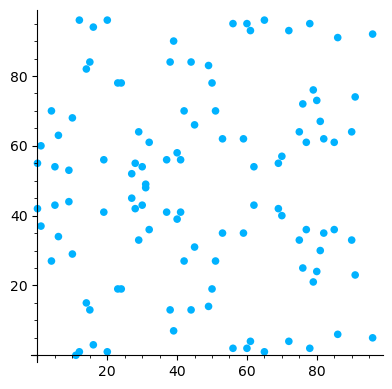

(0, 55)  	order: 56
(1, 37)  	order: 112
(1, 60)  	order: 112
(4, 27)  	order: 112
(4, 70)  	order: 112
(5, 43)  	order: 14
(5, 54)  	order: 14
(6, 34)  	order: 16
(6, 63)  	order: 16
(9, 44)  	order: 14
(9, 53)  	order: 14
(10, 29)  	order: 28
(10, 68)  	order: 28
(11, 0)  	unable to calculate order
(12, 1)  	order: 28
(12, 96)  	order: 28
(14, 15)  	order: 56
(14, 82)  	order: 56
(15, 13)  	order: 8
(15, 84)  	order: 8
(16, 3)  	order: 112
(16, 94)  	order: 112
(19, 41)  	order: 4
(19, 56)  	order: 4
(20, 1)  	order: 28
(20, 96)  	order: 28
(23, 19)  	order: 56
(23, 78)  	order: 56
(24, 19)  	order: 112
(24, 78)  	order: 112
(27, 45)  	order: 8
(27, 52)  	order: 8
(28, 42)  	order: 112
(28, 55)  	order: 112
(29, 33)  	order: 56
(29, 64)  	order: 56
(30, 43)  	order: 112
(30, 54)  	order: 112
(31, 48)  	order: 112
(31, 49)  	order: 112
(32, 36)  	order: 112
(32, 61)  	order: 112
(37, 41)  	order: 16
(37, 56)  	order: 16
(38, 13)  	order: 56
(38, 84)  	order: 56
(39, 7)  	order: 16
(39

In [337]:
a = -8
b = 18
p = 97
pts2 = finiteCurve(a,b,p)

i = 0
for pt99 in pts2:
    if(i ==0): 
        i+= 1
        continue
    try:
        ord = orderPt(pt99,a,b,p)
        print("{}  \torder: {}".format(pt99, ord))
    except ZeroDivisionError:
        print("{}  \tunable to calculate order".format(pt99))

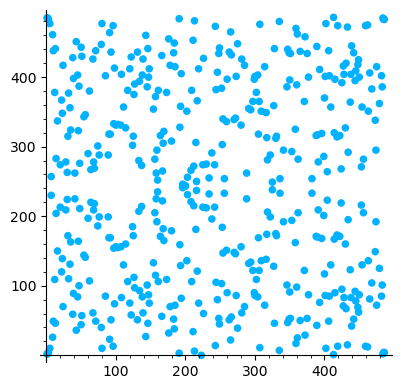

(1, 485)  	order: 158
(2, 2)  	order: 474
(2, 485)  	order: 474
(3, 4)  	order: 474
(3, 483)  	order: 474
(5, 10)  	order: 237
(5, 477)  	order: 237
(7, 230)  	order: 79
(7, 257)  	order: 79
(9, 26)  	order: 158
(9, 461)  	order: 158
(10, 49)  	order: 79
(10, 438)  	order: 79
(12, 109)  	order: 237
(12, 378)  	order: 237
(13, 46)  	order: 237
(13, 441)  	order: 237
(14, 204)  	order: 237
(14, 283)  	order: 237
(16, 150)  	order: 237
(16, 337)  	order: 237
(20, 213)  	order: 237
(20, 274)  	order: 237
(22, 120)  	order: 79
(22, 367)  	order: 79
(23, 139)  	order: 158
(23, 348)  	order: 158
(24, 70)  	order: 79
(24, 417)  	order: 79
(28, 209)  	order: 237
(28, 278)  	order: 237
(30, 224)  	order: 474
(30, 263)  	order: 474
(31, 172)  	order: 237
(31, 315)  	order: 237
(32, 110)  	order: 158
(32, 377)  	order: 158
(34, 131)  	order: 474
(34, 356)  	order: 474
(35, 163)  	order: 237
(35, 324)  	order: 237
(38, 59)  	order: 158
(38, 428)  	order: 158
(39, 89)  	order: 237
(39, 398)  	order:

(389, 43)  	order: 237
(389, 444)  	order: 237
(390, 170)  	order: 237
(390, 317)  	order: 237
(391, 209)  	order: 237
(391, 278)  	order: 237
(393, 76)  	order: 79
(393, 411)  	order: 79
(396, 168)  	order: 474
(396, 319)  	order: 474
(399, 201)  	order: 474
(399, 286)  	order: 474
(400, 117)  	order: 237
(400, 370)  	order: 237
(401, 86)  	order: 237
(401, 401)  	order: 237
(402, 10)  	order: 158
(402, 477)  	order: 158
(404, 223)  	order: 237
(404, 264)  	order: 237
(406, 49)  	order: 474
(406, 438)  	order: 474
(407, 85)  	order: 474
(407, 402)  	order: 474
(409, 130)  	order: 474
(409, 357)  	order: 474
(413, 1)  	order: 158
(413, 486)  	order: 158
(414, 167)  	order: 237
(414, 320)  	order: 237
(415, 90)  	order: 474
(415, 397)  	order: 474
(418, 173)  	order: 474
(418, 314)  	order: 474
(419, 13)  	order: 237
(419, 474)  	order: 237
(422, 171)  	order: 474
(422, 316)  	order: 474
(424, 219)  	order: 6
(424, 268)  	order: 6
(425, 95)  	order: 474
(425, 392)  	order: 474
(427, 71)

In [333]:
a = -7
b = 10
p = 487

pts3 = finiteCurve(a,b,p)

i = 0
for pt99 in pts3:
    if(i ==0): 
        i+= 1
        continue
    try:
        ord = orderPt(pt99,a,b,p)
        print("{}  \torder: {}".format(pt99, ord))
    except ZeroDivisionError:
        print("{}  \tunable to calculate order".format(pt99))

С непростым p:

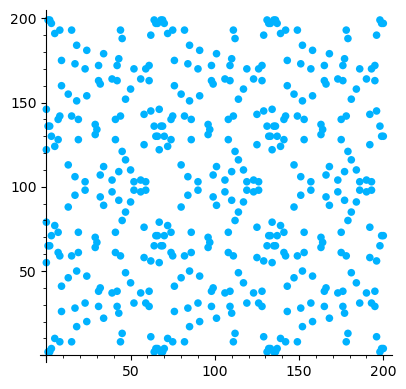

(0, 79)  	unable to calculate order
(0, 122)  	unable to calculate order
(0, 146)  	unable to calculate order
(1, 2)  	unable to calculate order
(1, 65)  	unable to calculate order
(1, 136)  	unable to calculate order
(1, 199)  	unable to calculate order
(2, 2)  	unable to calculate order
(2, 65)  	unable to calculate order
(2, 136)  	unable to calculate order
(2, 199)  	unable to calculate order
(3, 4)  	unable to calculate order
(3, 71)  	unable to calculate order
(3, 130)  	unable to calculate order
(3, 197)  	unable to calculate order
(5, 10)  	unable to calculate order
(5, 77)  	unable to calculate order
(5, 124)  	unable to calculate order
(5, 191)  	unable to calculate order
(7, 61)  	unable to calculate order
(7, 73)  	unable to calculate order
(7, 128)  	unable to calculate order
(7, 140)  	order: 4
(8, 8)  	unable to calculate order
(8, 59)  	unable to calculate order
(8, 142)  	unable to calculate order
(8, 193)  	unable to calculate order
(9, 26)  	unable to calculate order

In [368]:
a = -7
b = 10
p = 35

pts4 = finiteCurve(a,b,201)

i = 0
for pt99 in pts4:
    if(i ==0): 
        i+= 1
        continue
    try:
        ord = orderPt(pt99,a,b,p)
        print("{}  \torder: {}".format(pt99, ord))
    except ZeroDivisionError:
        print("{}  \tunable to calculate order".format(pt99))